In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv(r'C:\Users\prate\OneDrive\Desktop\Python_Diwal\Diwali Sales Data.csv',encoding = 'unicode_escape')

In [12]:
df.shape

(11251, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [19]:
df.drop(['Status','unnamed1'], axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [22]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [23]:
df.dropna(inplace=True)

In [25]:
df["Amount"]= df["Amount"].astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [31]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [35]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

In [37]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

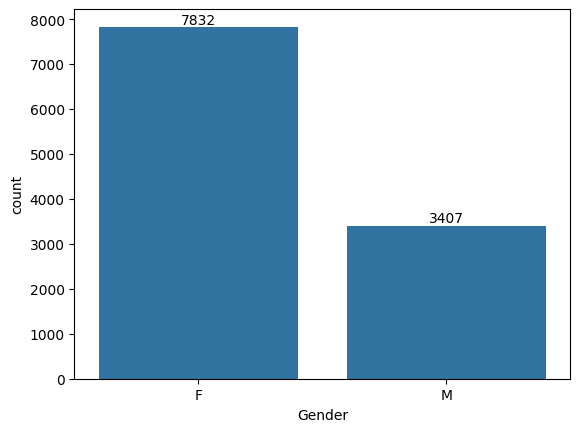

In [39]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

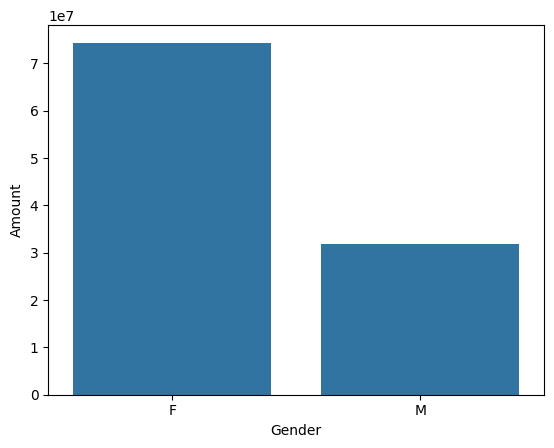

In [40]:
sales = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount' , data=sales)

##### From above graph we can see that most of the females and even the purchasing power of females are better than man

### Age

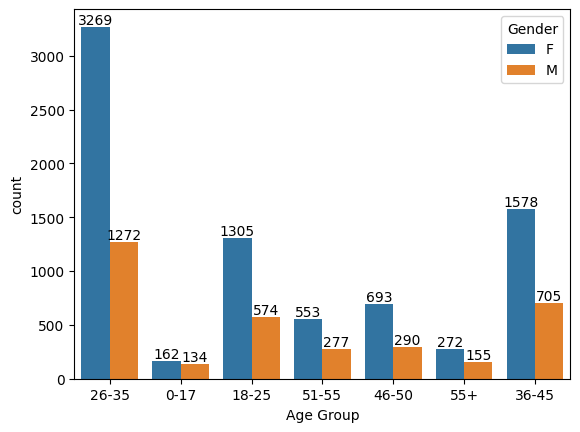

In [42]:
aging = sns.countplot(data = df, x= 'Age Group', hue= 'Gender')
for bars in aging.containers:
    aging.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

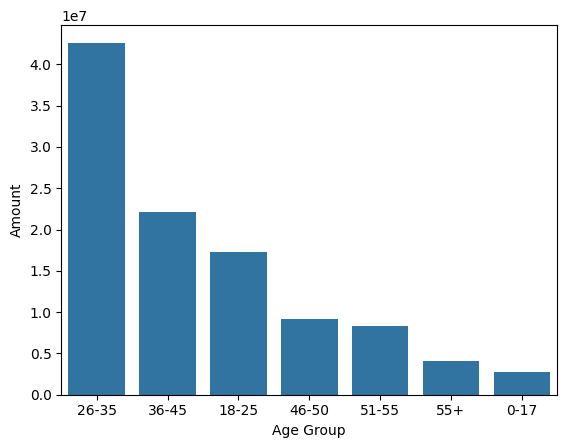

In [44]:
total = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount' , data=total)

###### From above graphs we can see that most of the buyers are of age group between 26-36 years female

#### State

<Axes: xlabel='State', ylabel='Orders'>

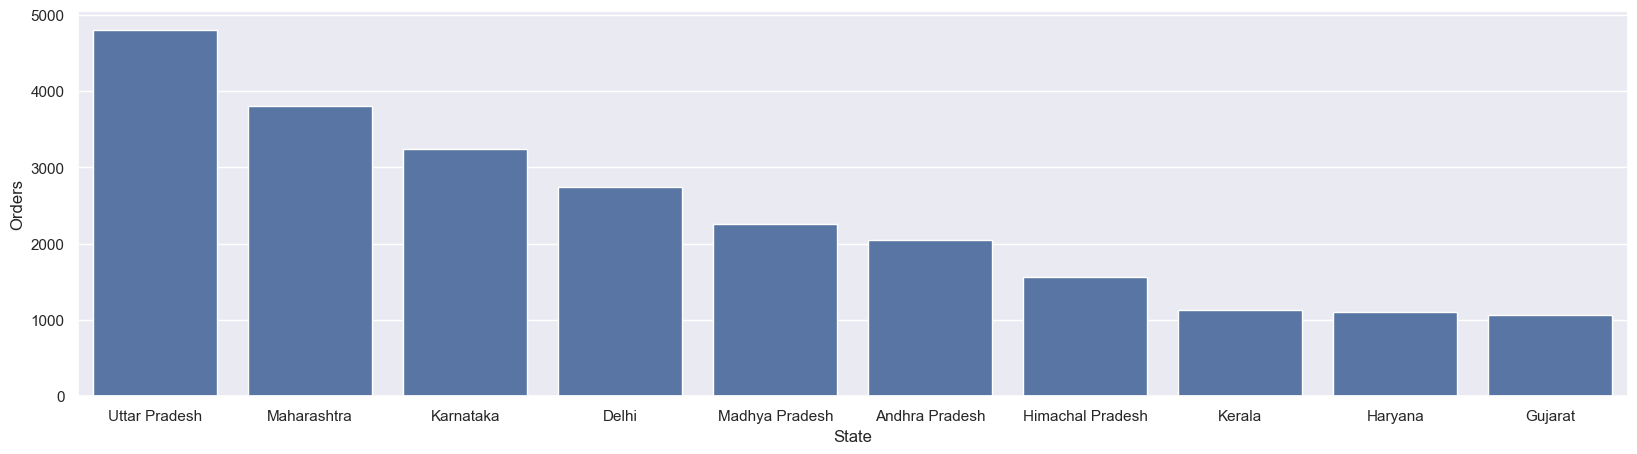

In [48]:
st = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Orders' , data=st)

<Axes: xlabel='State', ylabel='Amount'>

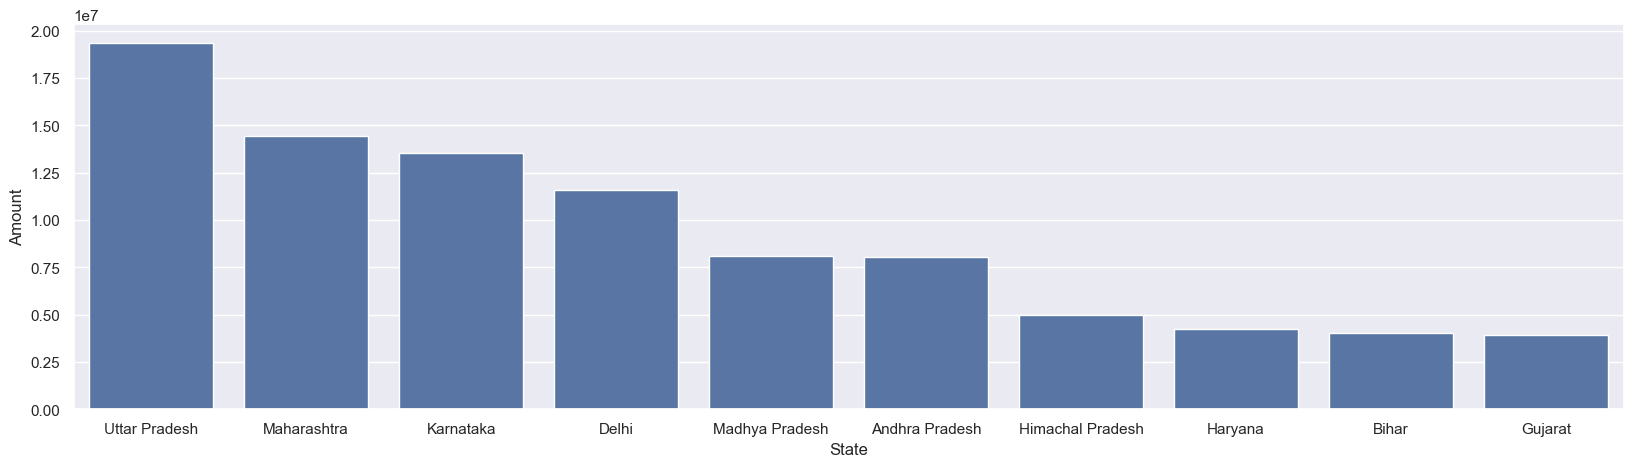

In [50]:
s = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount' , data=s)

###### From above graphs we can see that unexpectedly most of the orders are from Uttar Pradesh, Maharastra, and Karnataka respectively but total sales/amount is again from Uttar pradesh, Maharastra and Kartaka

### Marial Status

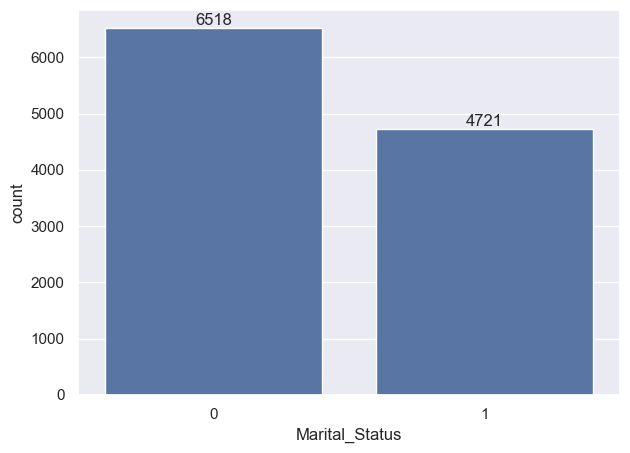

In [57]:
axi = sns.countplot(data = df, x ='Marital_Status')
sns.set(rc={'figure.figsize':(10,5)})
for bars in axi.containers:
    axi.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

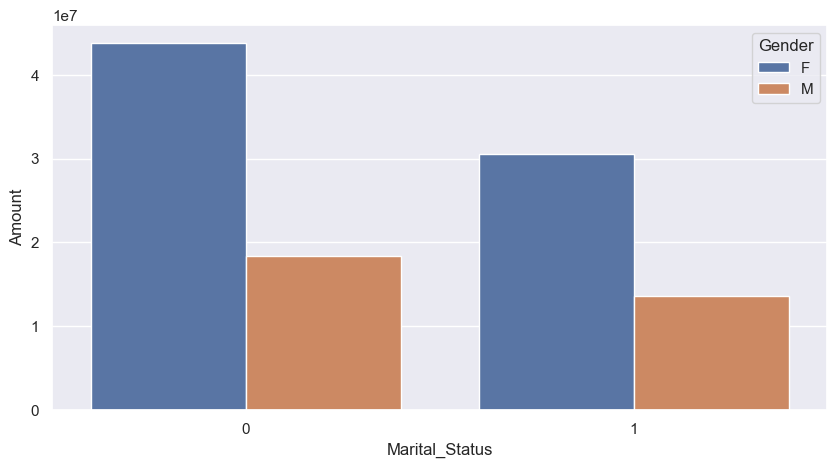

In [60]:
tot = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Marital_Status',y='Amount' , data=tot, hue = 'Gender')

### Occupation

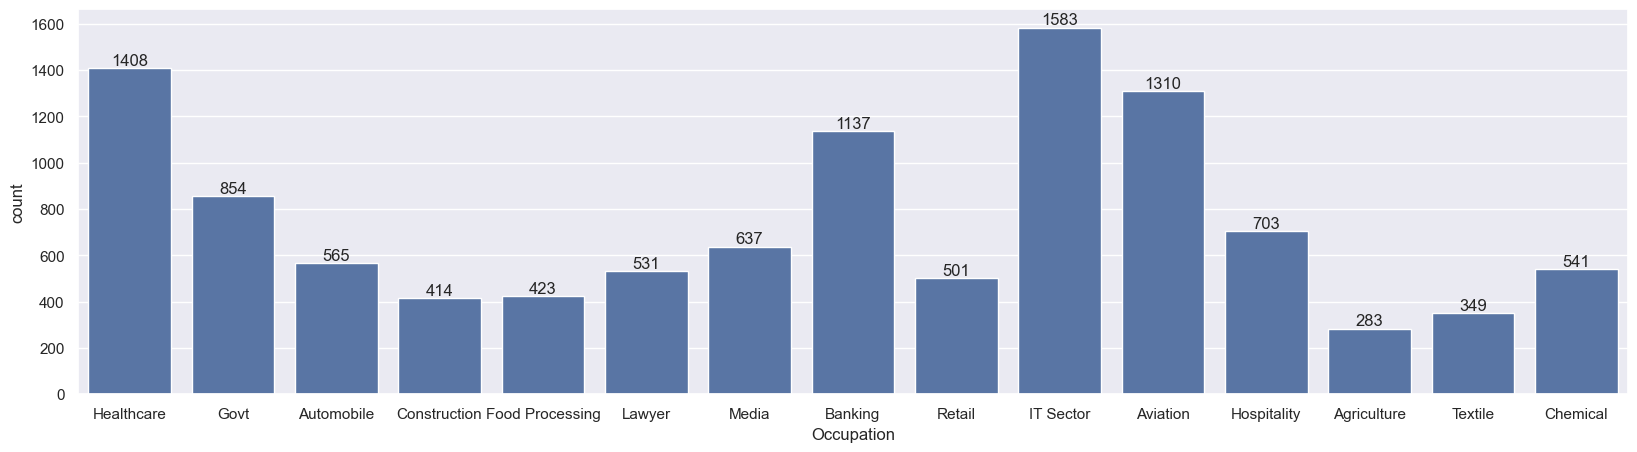

In [64]:
a = sns.countplot(data = df, x ='Occupation')
sns.set(rc={'figure.figsize':(50,5)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

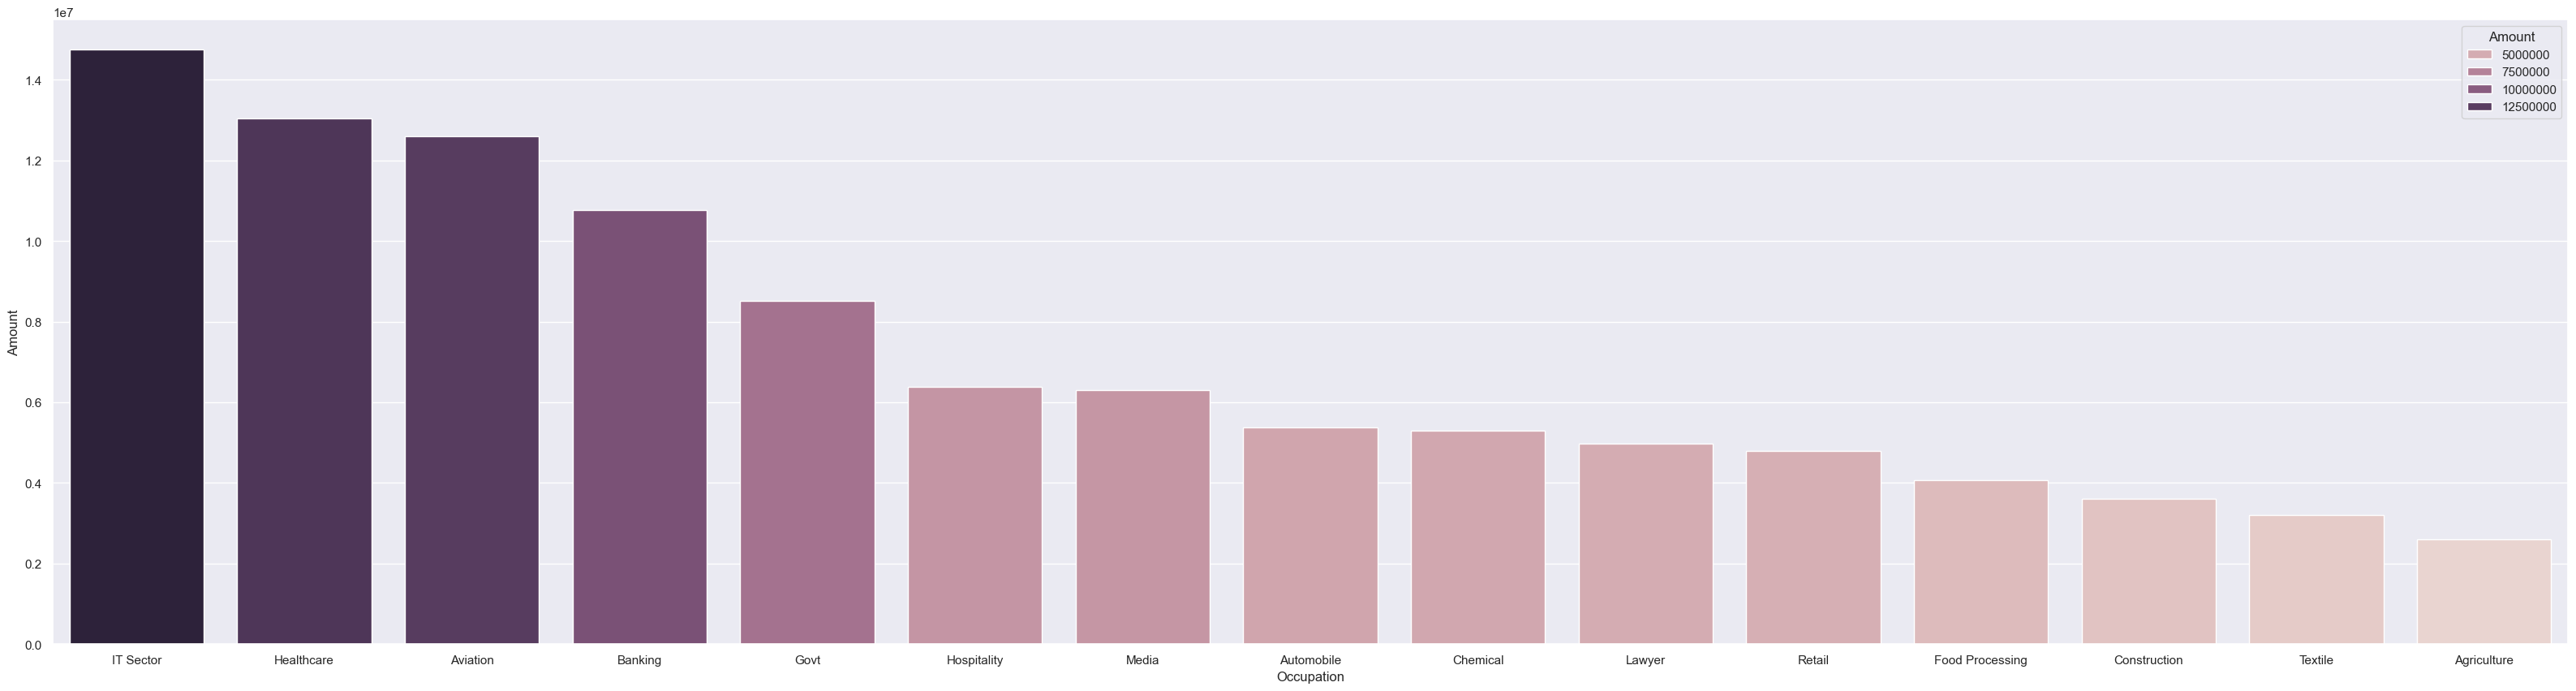

In [72]:
t = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(40,10)})
sns.barplot(x='Occupation',y='Amount' , data=t, hue = 'Amount')

##### From above graphs we can see that most of the buyers are working in IT, Aviation and sector

AttributeError: 'Axes' object has no attribute 'head'

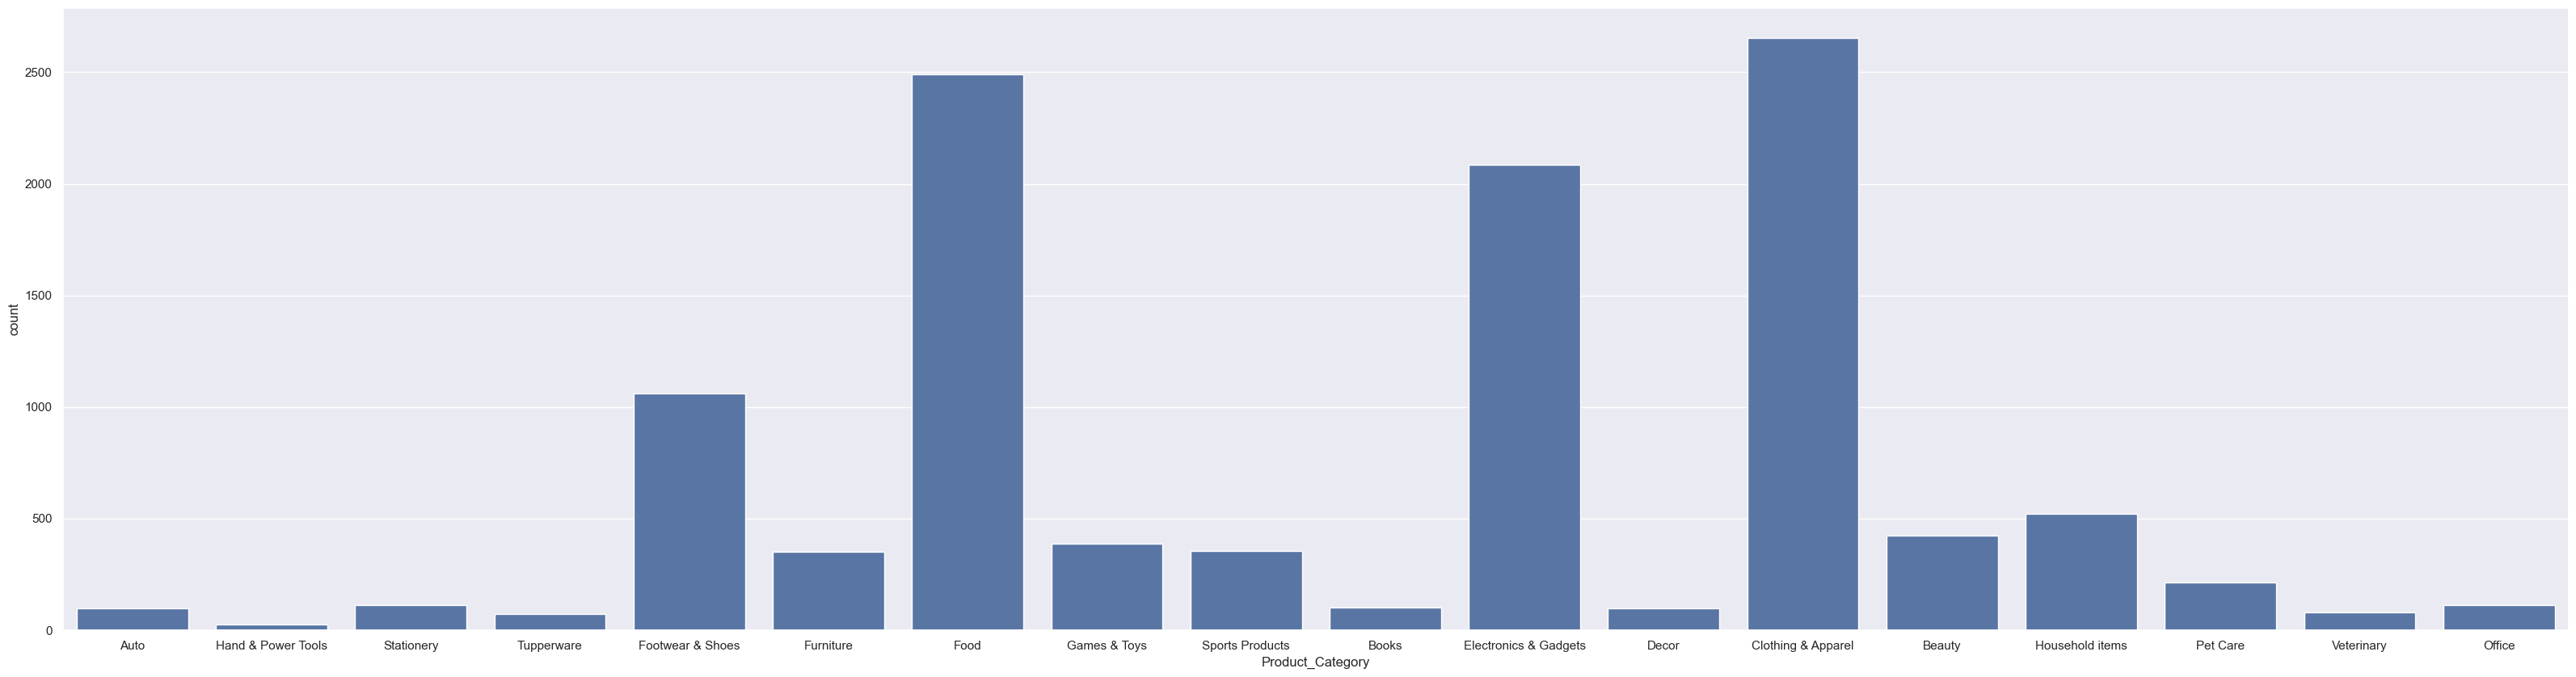

In [81]:
a = sns.countplot(data = df, x ='Product_Category').head(10)
sns.set(rc={'figure.figsize':(70,5)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

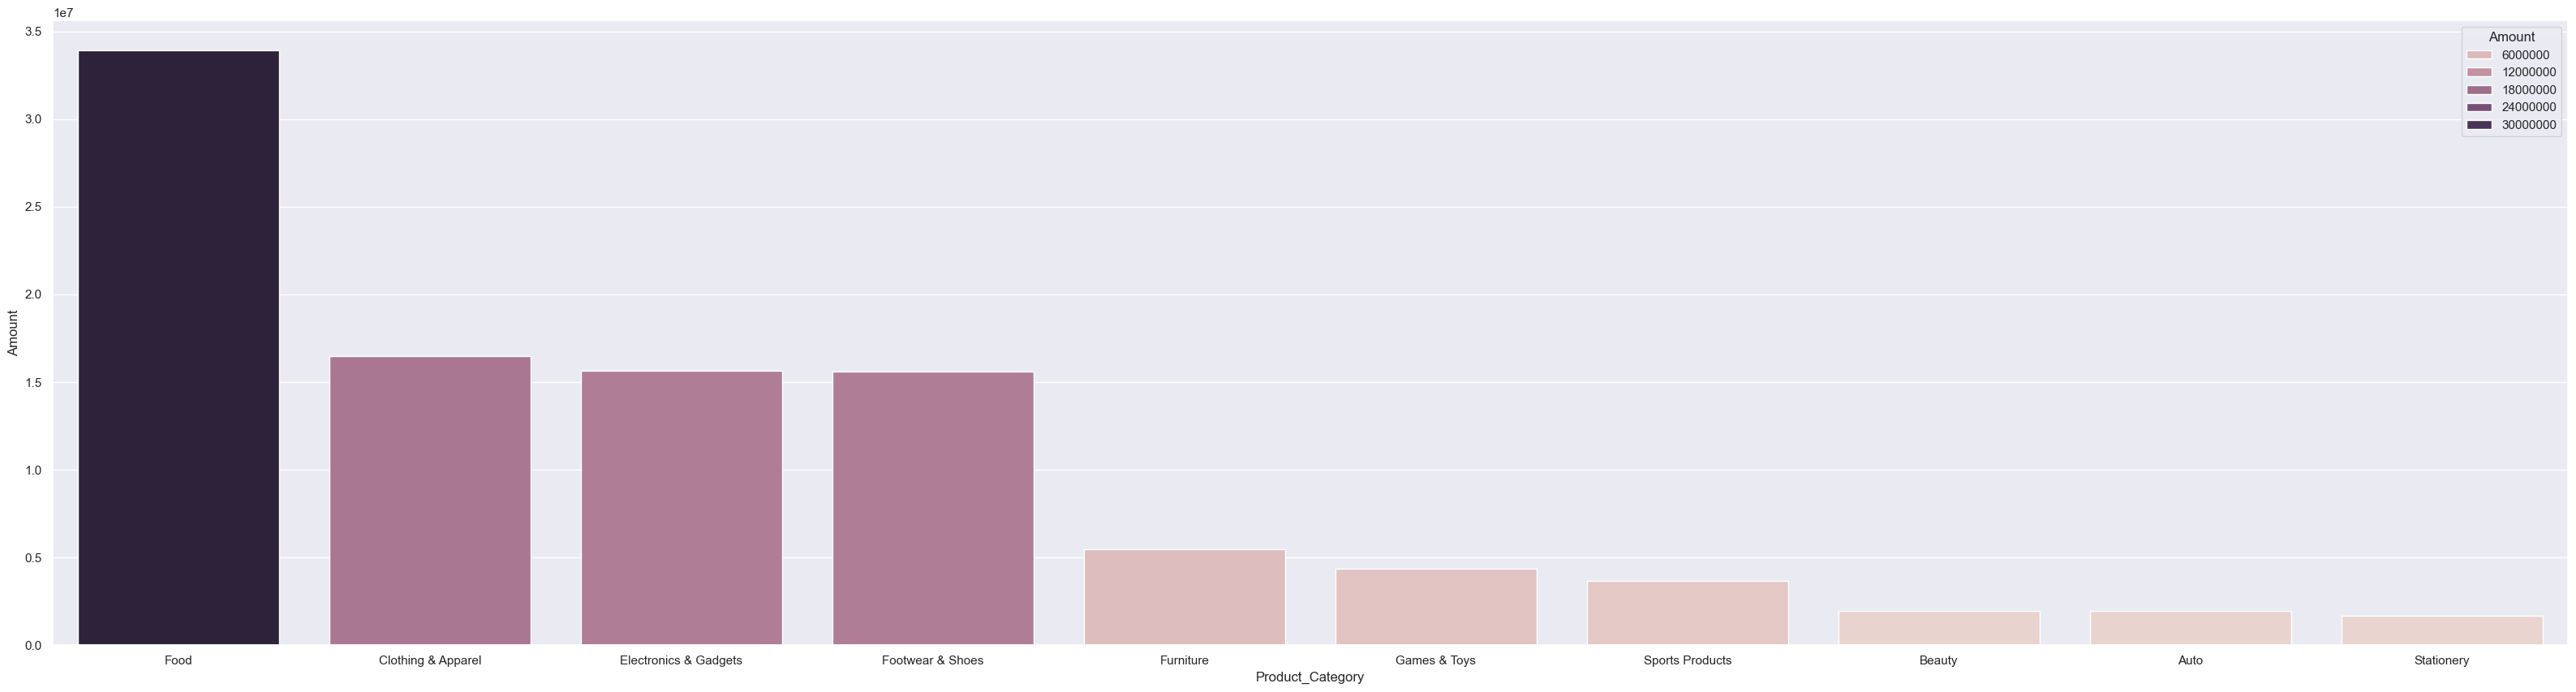

In [80]:
t = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(40,10)})
sns.barplot(x='Product_Category',y='Amount' , data=t, hue = 'Amount')

*From the above we can see that most of the sold products food, clothing and electronis*

#### Conclusion


*Married women women age group 26-35 years from UP, Maharastra and Karnataka working in IT, Healthcare and aviation are more likely buy products from Food, Clothing and electronics category.*